In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Charger les données
data = pd.read_csv("cr_loan_w2 (1).csv")

# Prétraitement (par exemple, sélectionner les colonnes pertinentes)
X = data.drop('loan_status', axis=1)  # Remplacer 'loan_status' par la colonne cible réelle
y = data['loan_status']

# Séparer les données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle de régression logistique
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Entraîner le modèle d'arbre boosté par gradient
gbt_model = GradientBoostingClassifier()
gbt_model.fit(X_train, y_train)

# Faire des prédictions avec les deux modèles
preds_lr = lr_model.predict(X_test_scaled)
preds_gbt = gbt_model.predict(X_test)

# Stocker les prédictions dans des DataFrames
preds_df_lr = pd.DataFrame({'loan_status': preds_lr})
preds_df_gbt = pd.DataFrame({'loan_status': preds_gbt})

# Afficher les rapports de classification
print("Rapport de classification - Régression logistique :")
print(classification_report(y_test, preds_df_lr['loan_status'], target_names=['Non-Défaut', 'Défaut']))

print("Rapport de classification - Arbre boosté par gradient :")
print(classification_report(y_test, preds_df_gbt['loan_status'], target_names=['Non-Défaut', 'Défaut']))

# Afficher les scores F1 pour chaque modèle
print("F1 Score - Régression logistique :")
print(precision_recall_fscore_support(y_test, preds_df_lr['loan_status'], average='macro')[2])

print("F1 Score - Arbre boosté par gradient :")
print(precision_recall_fscore_support(y_test, preds_df_gbt['loan_status'], average='macro')[2])


Rapport de classification - Régression logistique :
              precision    recall  f1-score   support

  Non-Défaut       0.89      0.96      0.92      4591
      Défaut       0.79      0.57      0.66      1301

    accuracy                           0.87      5892
   macro avg       0.84      0.76      0.79      5892
weighted avg       0.87      0.87      0.86      5892

Rapport de classification - Arbre boosté par gradient :
              precision    recall  f1-score   support

  Non-Défaut       0.92      0.99      0.96      4591
      Défaut       0.96      0.70      0.81      1301

    accuracy                           0.93      5892
   macro avg       0.94      0.85      0.88      5892
weighted avg       0.93      0.93      0.92      5892

F1 Score - Régression logistique :
0.79182989256709
F1 Score - Arbre boosté par gradient :
0.8845614240017461


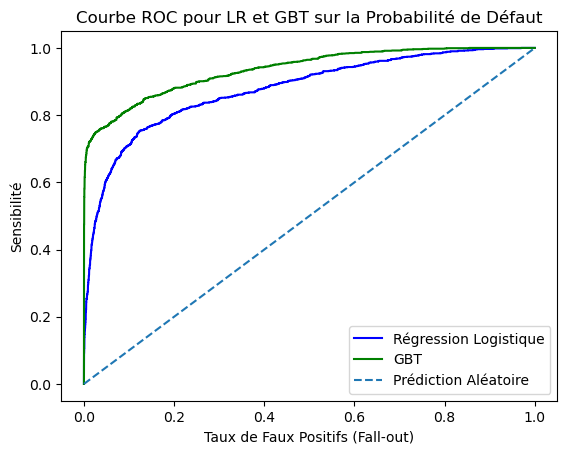

In [21]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Prédictions de probabilités pour la régression logistique
clf_logistic_preds = lr_model.predict_proba(X_test_scaled)[:, 1]  # Probabilité pour la classe 'défaut'

# Prédictions de probabilités pour l'arbre boosté par gradient
clf_gbt_preds = gbt_model.predict_proba(X_test)[:, 1]  # Probabilité pour la classe 'défaut'

# Composants de la courbe ROC
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, clf_logistic_preds)
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, clf_gbt_preds)

# Courbe ROC avec les deux modèles
plt.plot(fallout_lr, sensitivity_lr, color='blue', label='%s' % 'Régression Logistique')
plt.plot(fallout_gbt, sensitivity_gbt, color='green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Prédiction Aléatoire')
plt.title("Courbe ROC pour LR et GBT sur la Probabilité de Défaut")
plt.xlabel('Taux de Faux Positifs (Fall-out)')
plt.ylabel('Sensibilité')
plt.legend()
plt.show()


In [22]:
# Imprimer le score AUC de la régression logistique avec formatage
print("Score AUC de la Régression Logistique : %0.2f" % roc_auc_score(y_test, clf_logistic_preds))

# Imprimer le score AUC de l'arbre boosté par gradient avec formatage
print("Score AUC de l'Arbre Boosté par Gradient : %0.2f" % roc_auc_score(y_test, clf_gbt_preds))


Score AUC de la Régression Logistique : 0.88
Score AUC de l'Arbre Boosté par Gradient : 0.94


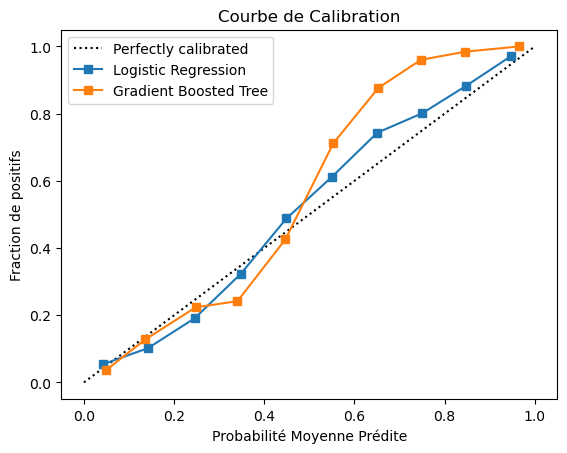

In [23]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Charger et préparer les données (remplace par tes propres données)
# data = pd.read_csv("cr_loan_w2 (1).csv")
X = data.drop('loan_status', axis=1)  # Remplacer par la colonne cible réelle
y = data['loan_status']

# Diviser les données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement des modèles
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

gbt_model = GradientBoostingClassifier()
gbt_model.fit(X_train, y_train)

# Prédictions des probabilités pour les deux modèles
clf_logistic_preds = lr_model.predict_proba(X_test_scaled)[:, 1]  # Probabilité de défaut
clf_gbt_preds = gbt_model.predict_proba(X_test)[:, 1]  # Probabilité de défaut

# Calcul des courbes de calibration pour les deux modèles
frac_of_pos_lr, mean_pred_val_lr = calibration_curve(y_test, clf_logistic_preds, n_bins=10)
frac_of_pos_gbt, mean_pred_val_gbt = calibration_curve(y_test, clf_gbt_preds, n_bins=10)

# Tracer les courbes de calibration
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    

# Courbe de calibration pour la régression logistique
plt.plot(mean_pred_val_lr, frac_of_pos_lr, 
         's-', label='%s' % 'Logistic Regression')

# Courbe de calibration pour l'arbre boosté par gradient
plt.plot(mean_pred_val_gbt, frac_of_pos_gbt, 
         's-', label='%s' % 'Gradient Boosted Tree')

# Ajouter les étiquettes et la légende
plt.ylabel('Fraction de positifs')
plt.xlabel('Probabilité Moyenne Prédite')
plt.legend()
plt.title('Courbe de Calibration')
plt.show()


La méthode predict() pour le modèle Gradient Boosting donne uniquement des étiquettes de classe (0 pour "Non-Défaut", 1 pour "Défaut"). Pour pouvoir calculer le seuil basé sur le taux d'acceptation (comme 85 %), nous avons besoin des probabilités de défaut, pas juste des classes.

In [24]:
# Prédire les probabilités avec l'arbre boosté par gradient
probs_gbt = gbt_model.predict_proba(X_test)[:, 1]  # Prend les probabilités associées à la classe "Défaut" (classe 1)

# Stocker les probabilités de défaut dans un DataFrame
test_pred_df = pd.DataFrame({'prob_default': probs_gbt, 'true_loan_status': y_test})

# Afficher les statistiques des probabilités de défaut
print(test_pred_df['prob_default'].describe())

# Calculer le seuil pour un taux d'acceptation de 85 %
threshold_85 = np.quantile(test_pred_df['prob_default'], 0.85)

# Appliquer le seuil du taux d'acceptation pour assigner les statuts de prêt prédits
test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

# Afficher le nombre de prêts défaillants et non-défaillants après application du seuil
print(test_pred_df['pred_loan_status'].value_counts())

# Évaluer la performance du modèle après l'application du seuil
print("Rapport de classification après application du seuil de 85 % :")
print(classification_report(test_pred_df['true_loan_status'], test_pred_df['pred_loan_status'], target_names=['Non-Défaut', 'Défaut']))


count   $5,892.00
mean        $0.22
std         $0.30
min         $0.00
25%         $0.04
50%         $0.08
75%         $0.20
max         $1.00
Name: prob_default, dtype: float64
pred_loan_status
0    5008
1     884
Name: count, dtype: int64
Rapport de classification après application du seuil de 85 % :
              precision    recall  f1-score   support

  Non-Défaut       0.91      1.00      0.95      4591
      Défaut       0.98      0.67      0.79      1301

    accuracy                           0.92      5892
   macro avg       0.95      0.83      0.87      5892
weighted avg       0.93      0.92      0.92      5892



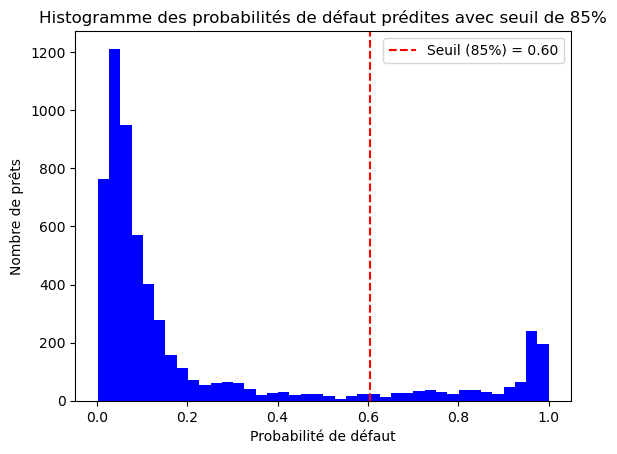

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Tracer l'histogramme des probabilités de défaut prédites
plt.hist(clf_gbt_preds, color='blue', bins=40)

# Calculer le seuil avec quantile (pour un taux d'acceptation de 85%)
threshold = np.quantile(clf_gbt_preds, 0.85)

# Ajouter une ligne de référence sur le graphique pour le seuil
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Seuil (85%) = {threshold:.2f}')

# Ajouter un titre et des labels
plt.title("Histogramme des probabilités de défaut prédites avec seuil de 85%")
plt.xlabel("Probabilité de défaut")
plt.ylabel("Nombre de prêts")

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


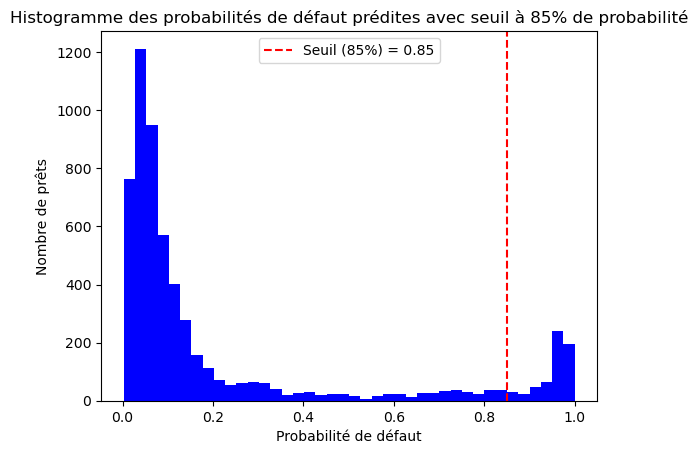

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Tracer l'histogramme des probabilités de défaut prédites
plt.hist(clf_gbt_preds, color='blue', bins=40)

# Forcer le seuil à une probabilité fixe de 85 %
threshold = 0.85

# Ajouter une ligne de référence sur le graphique pour la probabilité de défaut de 85 %
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Seuil (85%) = {threshold:.2f}')

# Ajouter un titre et des labels
plt.title("Histogramme des probabilités de défaut prédites avec seuil à 85% de probabilité")
plt.xlabel("Probabilité de défaut")
plt.ylabel("Nombre de prêts")

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


In [27]:
import numpy as np
import pandas as pd

# Supposons que 'test_pred_df' est le DataFrame contenant les colonnes 'pred_loan_status' (statut prédit) 
# et 'true_loan_status' (statut réel).

# Afficher les 5 premières lignes du DataFrame
print(test_pred_df.head())

# Créer un sous-ensemble de prêts acceptés (où 'pred_loan_status' est 0, c'est-à-dire non-défaillant selon les prédictions)
accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]

# Calculer le taux de défaut (Bad Rate) parmi les prêts acceptés
bad_rate = np.sum(accepted_loans['true_loan_status']) / accepted_loans['true_loan_status'].count()

# Afficher le taux de défaut (Bad Rate)
print(f"Taux de défaut parmi les prêts acceptés : {bad_rate:.2%}")


       prob_default  true_loan_status  pred_loan_status
4235          $0.94                 1                 1
17927         $0.02                 0                 0
27116         $0.05                 0                 0
21329         $0.05                 0                 0
9913          $0.01                 0                 0
Taux de défaut parmi les prêts acceptés : 8.69%


## Commentaire sur le taux des prêts prédits comme non defaut et qui ont finis defaut
Analyse du taux de défaut (Bad Rate) :
8,26 % signifie que parmi les prêts que le modèle a acceptés (ceux avec pred_loan_status == 0), 8,26 % d'entre eux ont fini par faire défaut.
Cela montre que même si le modèle a rejeté certains prêts en se basant sur les probabilités de défaut, une petite proportion de ceux qu'il a acceptés ont quand même fait défaut.

In [28]:
import numpy as np
import pandas as pd

# Vérifier et ajouter la colonne loan_amnt si elle est absente dans test_pred_df
if 'loan_amnt' not in test_pred_df.columns and 'loan_amnt' in X_test.columns:
    test_pred_df['loan_amnt'] = X_test['loan_amnt'].reset_index(drop=True)

# Afficher les statistiques de la colonne loan_amnt (montant des prêts)
print(test_pred_df['loan_amnt'].describe())

# Stocker le montant moyen des prêts
avg_loan = np.mean(test_pred_df['loan_amnt'])

# Configurer le formatage des nombres en devise (dollars avec deux décimales)
pd.options.display.float_format = '${:,.2f}'.format

# Créer un tableau croisé (crosstab) des statuts réels et prédits, puis multiplier par le montant moyen des prêts
print(pd.crosstab(test_pred_df['true_loan_status'],
                 test_pred_df['pred_loan_status']).apply(lambda x: x * avg_loan, axis=0))


count    $1,140.00
mean     $9,632.43
std      $6,311.44
min      $1,000.00
25%      $5,000.00
50%      $8,000.00
75%     $12,356.25
max     $35,000.00
Name: loan_amnt, dtype: float64
pred_loan_status              0             1
true_loan_status                             
0                $44,049,121.64   $173,383.82
1                 $4,190,108.88 $8,341,688.03


Tableau croisé de l'impact financier :
pred_loan_status = 0 : Ce sont les prêts prédits comme non-défaillants (prêts acceptés).
pred_loan_status = 1 : Ce sont les prêts prédits comme défaillants (prêts rejetés).
Le tableau présente les montants totaux des prêts dans chaque catégorie de statut réel (défaut ou non) et statut prédit.

Interprétation des montants :
Pour les prêts réellement non-défaillants (true_loan_status = 0) :

Le modèle a correctement prédit un total de 44 049 121.64  comme non-défaillants.
Il a rejeté 173 383.82  comme défaillants, mais ces prêts étaient en fait non-défaillants.
Pour les prêts réellement défaillants (true_loan_status = 1) :

Le modèle a incorrectement accepté des prêts défaillants pour un total de 4 190 108.88  (prêts que le modèle a jugé non-défaillants, mais qui ont fait défaut).
Il a correctement rejeté des prêts défaillants pour un total de 8 341 688.03 .
Conclusion :
Prêts correctement acceptés : Ton modèle a accepté 44 049 121.64 en prêts non-défaillants, ce qui est positif.
Prêts incorrectement acceptés (Bad Rate) : Ton modèle a accepté environ 4.19 millions de dollars de prêts qui ont fini par faire défaut, ce qui représente une partie du bad rate.
Prêts correctement rejetés : Il a rejeté 8.34 millions de dollars de prêts défaillants, évitant ainsi des pertes potentielles.


## Tableau de stratégie
1. Taux d'acceptation et stratégie :
Le taux d'acceptation est la proportion de nouveaux prêts que l'on accepte dans le portefeuille.
Un tableau de stratégie permet de tester différents taux d'acceptation (par exemple, 85 %, 90 %) pour comprendre leur impact sur le portefeuille, en particulier en termes de taux de défaut (Bad Rate).
2. Tableau de stratégie :
On crée un tableau de stratégie en calculant pour chaque taux d'acceptation :
Le seuil correspondant (la probabilité de défaut à partir de laquelle les prêts sont acceptés ou rejetés).
Le taux de défaut (proportion de prêts acceptés qui feront défaut).
Ce tableau aide à évaluer les compromis entre l'acceptation de plus de prêts et l'augmentation des défauts.
3. Estimation de la valeur du portefeuille :
On peut estimer la valeur du portefeuille en comparant les prêts non-défaillants acceptés et les prêts défaillants acceptés.
Plus le taux d'acceptation est élevé, plus le taux de défaut augmente, entraînant des pertes plus importantes dans le portefeuille.
4. Perte totale attendue :
La perte totale attendue est un indicateur financier qui estime combien la banque risque de perdre en raison des défauts de paiement.
Cette perte est calculée en multipliant la probabilité de défaut par la perte en cas de défaut et l'exposition en cas de défaut pour chaque prêt.
5. Compromis entre taux d'acceptation et taux de défaut :
Un taux d'acceptation élevé (par exemple 95 %) augmente le nombre de prêts acceptés, mais aussi le taux de défaut (par exemple 17,7 %).
Un taux d'acceptation plus faible (par exemple 85 %) diminue le nombre de prêts acceptés mais réduit le taux de défaut (9 %).

In [29]:
print(preds_df_gbt.columns)


Index(['loan_status'], dtype='object')


In [31]:
import numpy as np
import pandas as pd

# Les tableaux de taux d'acceptation, seuils et taux de défaut
accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
thresholds = []
bad_rates = []

# Ajouter les probabilités de défaut calculées précédemment dans un DataFrame
test_pred_df = pd.DataFrame({
    'prob_default': clf_gbt_preds,  # Probabilité de défaut du modèle Gradient Boosting
    'true_loan_status': y_test      # Statut réel du prêt
})

# Remplir les tableaux pour le tableau de stratégie avec une boucle for
for rate in accept_rates:
    # Calculer le seuil pour le taux d'acceptation
    thresh = np.quantile(test_pred_df['prob_default'], rate).round(3)
    
    # Ajouter la valeur de seuil à la liste des seuils
    thresholds.append(thresh)
    
    # Réaffecter les valeurs du statut du prêt en utilisant le seuil
    test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    
    # Créer un sous-ensemble des prêts acceptés en utilisant ce taux d'acceptation
    accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]
    
    # Calculer et ajouter le taux de défaut (Bad Rate) pour le taux d'acceptation
    bad_rate = np.sum(accepted_loans['true_loan_status']) / len(accepted_loans['true_loan_status'])
    bad_rates.append(bad_rate.round(3))

# Afficher les taux d'acceptation, les seuils et les taux de défaut
strategy_table = pd.DataFrame({
    'Acceptance Rate': accept_rates,
    'Threshold': thresholds,
    'Bad Rate': bad_rates
})

print(strategy_table)


    Acceptance Rate  Threshold  Bad Rate
0             $1.00      $1.00     $0.22
1             $0.95      $0.97     $0.18
2             $0.90      $0.86     $0.13
3             $0.85      $0.60     $0.09
4             $0.80      $0.31     $0.07
5             $0.75      $0.20     $0.06
6             $0.70      $0.14     $0.05
7             $0.65      $0.12     $0.04
8             $0.60      $0.10     $0.04
9             $0.55      $0.09     $0.03
10            $0.50      $0.08     $0.03
11            $0.45      $0.07     $0.02
12            $0.40      $0.06     $0.02
13            $0.35      $0.05     $0.01
14            $0.30      $0.05     $0.01
15            $0.25      $0.04     $0.01
16            $0.20      $0.04     $0.00
17            $0.15      $0.03     $0.00
18            $0.10      $0.02     $0.00
19            $0.05      $0.01     $0.00


## Commenataire sur le tableau de stratégie
D'après la sortie, le tableau montre clairement les taux d'acceptation, les seuils associés, et les taux de défaut (Bad Rate) correspondants.

Interprétation de la sortie :
Taux d'acceptation (Acceptance Rate) :

Les valeurs vont de 1.0 (100 % des prêts acceptés) à 0.05 (5 % des prêts acceptés).
Plus le taux d'acceptation est élevé, plus tu acceptes de prêts avec des risques élevés.
Seuil (Threshold) :

Le seuil correspond à la probabilité de défaut au-dessus de laquelle un prêt est rejeté.
Par exemple, pour un taux d'acceptation de 85 %, le seuil est de 0.60, ce qui signifie que les prêts avec une probabilité de défaut supérieure à 60 % sont rejetés.
Pour des taux d'acceptation plus faibles, le seuil diminue, signifiant que seuls les prêts les plus sûrs sont acceptés.
Taux de défaut (Bad Rate) :

C'est la proportion de prêts acceptés qui se sont révélés être des défauts.
Par exemple, pour un taux d'acceptation de 85 %, le taux de défaut est de 9 %.
On voit clairement que plus le taux d'acceptation est bas, plus le taux de défaut diminue, avec des taux de défaut très bas (voire 0 %) lorsque seuls les prêts les plus sûrs sont acceptés (par exemple, avec un taux d'acceptation de 10 % ou moins).
Conclusion :
Ce tableau te permet de visualiser le compromis entre le taux d'acceptation et le taux de défaut. Plus tu acceptes de prêts, plus tu prends de risques (le taux de défaut augmente), tandis qu'une sélection plus stricte (un taux d'acceptation faible) réduit ce risque mais diminue aussi le nombre de prêts acceptés.

In [33]:
import pandas as pd

# Réinitialiser le formatage des nombres pour éviter le symbole $
pd.options.display.float_format = None

# Créer un DataFrame pour le tableau de stratégie
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates),
                        columns=['Acceptance Rate', 'Threshold', 'Bad Rate'])

# Afficher le tableau complet
print(strat_df)


    Acceptance Rate  Threshold  Bad Rate
0              1.00      1.000     0.221
1              0.95      0.970     0.181
2              0.90      0.858     0.134
3              0.85      0.604     0.087
4              0.80      0.308     0.066
5              0.75      0.197     0.056
6              0.70      0.145     0.046
7              0.65      0.121     0.041
8              0.60      0.105     0.036
9              0.55      0.089     0.033
10             0.50      0.078     0.028
11             0.45      0.069     0.023
12             0.40      0.060     0.020
13             0.35      0.054     0.014
14             0.30      0.049     0.009
15             0.25      0.044     0.007
16             0.20      0.037     0.004
17             0.15      0.030     0.001
18             0.10      0.022     0.000
19             0.05      0.013     0.000


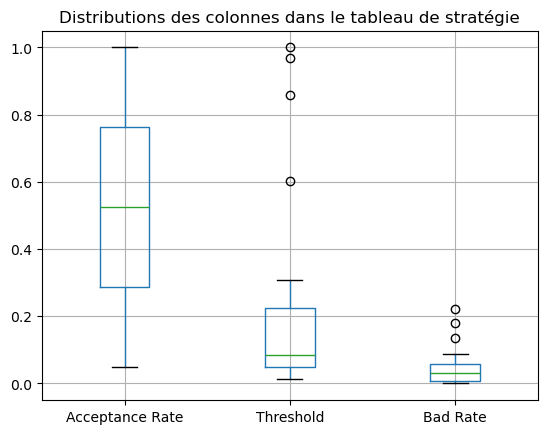

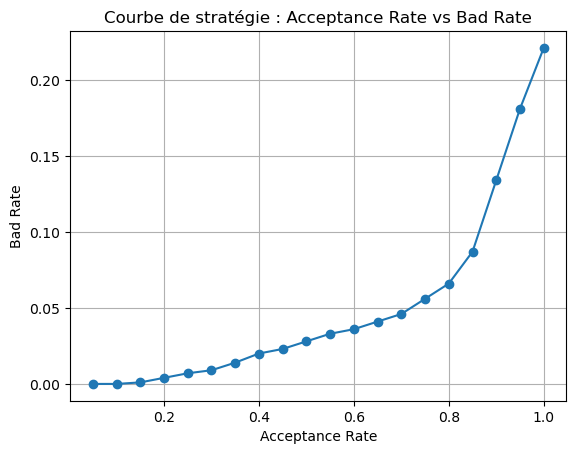

In [34]:
import matplotlib.pyplot as plt

# Visualiser les distributions dans le tableau de stratégie avec un boxplot
strat_df.boxplot()
plt.title("Distributions des colonnes dans le tableau de stratégie")
plt.show()

# Visualiser la courbe de stratégie avec un graphique en ligne
plt.plot(strat_df['Acceptance Rate'], strat_df['Bad Rate'], marker='o', linestyle='-')
plt.title("Courbe de stratégie : Acceptance Rate vs Bad Rate")
plt.xlabel("Acceptance Rate")
plt.ylabel("Bad Rate")
plt.grid(True)
plt.show()


## Commentaire Boxplot
Si la distribution du taux d'acceptation et celle du taux de défaut sont similaires, cela indique que, chaque fois que tu acceptes plus de prêts, une proportion similaire d'entre eux fait défaut. Cela signifie que ton modèle n'arrive pas à bien distinguer les prêts risqués des prêts non risqués, donc accepter plus de prêts n'améliore pas vraiment le rendement global.

Ce que cela indique sur la calibration :
Un modèle bien calibré est capable de prédire correctement les probabilités de défaut pour chaque prêt.
Si les distributions sont similaires, cela signifie que le modèle ne discrimine pas bien entre les bons et les mauvais prêts : plus tu acceptes de prêts, plus le taux de défaut augmente proportionnellement, ce qui suggère une calibration médiocre du modèle.
En résumé :
Si les distributions de taux d'acceptation et taux de défaut sont similaires, cela montre que le modèle n'est pas bien calibré pour gérer les risques de défaut. Un modèle bien calibré permettrait de maintenir un taux de défaut bas même en augmentant le taux d'acceptation, en rejetant correctement les prêts les plus risqués.

In [35]:
import numpy as np
import pandas as pd

# Calculer le montant moyen des prêts dans le jeu de test (exemple: prêt moyen de 9556.28)
avg_loan_amnt = 9556.28  # Si cette valeur doit être calculée dynamiquement, utilise np.mean(test_pred_df['loan_amnt'])

# Calculer le nombre total de prêts dans le jeu de test
total_loans = len(test_pred_df)

# Les colonnes supplémentaires
num_accepted_loans = []
estimated_values = []

# Remplir le tableau de stratégie avec les nouvelles colonnes
for rate, threshold in zip(accept_rates, thresholds):
    # Réaffecter les valeurs du statut du prêt en utilisant le seuil
    test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold else 0)
    
    # Créer un sous-ensemble des prêts acceptés
    accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]
    num_accepted = len(accepted_loans)
    num_accepted_loans.append(num_accepted)
    
    # Calculer le nombre de prêts défaillants et non-défaillants
    num_defaults = np.sum(accepted_loans['true_loan_status'])  # Prêts défaillants
    num_non_defaults = num_accepted - num_defaults  # Prêts non-défaillants
    
    # Valeur estimée = (non-défaillants * montant moyen) - (défaillants * montant moyen)
    estimated_value = (num_non_defaults * avg_loan_amnt) - (num_defaults * avg_loan_amnt)
    estimated_values.append(estimated_value)

# Ajouter les nouvelles colonnes au DataFrame strat_df
strat_df['Num Accepted Loans'] = num_accepted_loans
strat_df['Avg Loan Amnt'] = [avg_loan_amnt] * len(accept_rates)  # Même montant pour chaque ligne
strat_df['Estimated Value'] = estimated_values

# Afficher le tableau de stratégie amélioré
print(strat_df)


    Acceptance Rate  Threshold  Bad Rate  Num Accepted Loans  Avg Loan Amnt  \
0              1.00      1.000     0.221                5892        9556.28   
1              0.95      0.970     0.181                5604        9556.28   
2              0.90      0.858     0.134                5303        9556.28   
3              0.85      0.604     0.087                5007        9556.28   
4              0.80      0.308     0.066                4714        9556.28   
5              0.75      0.197     0.056                4421        9556.28   
6              0.70      0.145     0.046                4117        9556.28   
7              0.65      0.121     0.041                3826        9556.28   
8              0.60      0.105     0.036                3545        9556.28   
9              0.55      0.089     0.033                3235        9556.28   
10             0.50      0.078     0.028                2952        9556.28   
11             0.45      0.069     0.023            

In [36]:
# Afficher la ligne avec la valeur estimée maximale
print(strat_df.loc[strat_df['Estimated Value'] == np.max(strat_df['Estimated Value'])])


   Acceptance Rate  Threshold  Bad Rate  Num Accepted Loans  Avg Loan Amnt  \
3             0.85      0.604     0.087                5007        9556.28   

   Estimated Value  
3      39553442.92  


In [39]:
# Supposons que X_test contient la colonne 'loan_amnt'
test_pred_df['loan_amnt'] = X_test['loan_amnt'].reset_index(drop=True)


In [40]:
# Afficher les colonnes de test_pred_df
print(test_pred_df.columns)

Index(['prob_default', 'true_loan_status', 'pred_loan_status',
       'loss_given_default', 'loan_amnt'],
      dtype='object')


In [41]:
import numpy as np

# Ajouter la colonne 'loan_amnt' depuis X_test si elle est absente
if 'loan_amnt' not in test_pred_df.columns and 'loan_amnt' in X_test.columns:
    test_pred_df['loan_amnt'] = X_test['loan_amnt'].reset_index(drop=True)

# Ajouter la colonne 'loss_given_default' avec une perte de 100 % (1.0)
test_pred_df['loss_given_default'] = 1.0

# Calculer la perte attendue pour chaque prêt et l'ajouter dans une nouvelle colonne 'expected_loss'
test_pred_df['expected_loss'] = test_pred_df['prob_default'] * test_pred_df['loan_amnt'] * test_pred_df['loss_given_default']

# Calculer la perte totale attendue, arrondie à deux décimales
tot_exp_loss = round(np.sum(test_pred_df['expected_loss']), 2)

# Afficher la perte totale attendue
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))


Total expected loss:  $2,844,413.69


## Conclusion 
Premièrement, concentrez-vous sur les données. Je sais que ce n'est pas la partie la plus glamour de la science des données, mais l'ingénierie des données est très précieuse. Vous en apprenez davantage sur le métier en préparant et en comprenant les données qu'en modélisant. De plus, vous créez de la valeur pour l'entreprise, car les données sont souvent considérées comme un actif précieux. Deuxièmement, la complexité des modèles est une arme à double tranchant. Les modèles complexes peuvent très bien fonctionner, mais leur complexité les rend difficiles à comprendre. Si les utilisateurs métiers ne comprennent pas le modèle, ils sont peu susceptibles de l'utiliser.

Voici le principe de chaque framework, accompagné d'un exemple précis :

## Structural Model Framework :

Principe : Ce cadre modélise le défaut en se basant sur les fondamentaux économiques d'une entreprise (valeur des actifs, dettes). Un défaut survient si la valeur des actifs tombe en dessous d'un seuil critique (généralement la valeur des dettes).
Exemple : Le modèle de Merton : Si la valeur des actifs d'une entreprise devient inférieure à ses dettes à l'échéance, elle fait défaut. Ce modèle calcule la probabilité de défaut en fonction des fluctuations de la valeur des actifs et des passifs de l'entreprise.

## Through the Cycle Model :
Principe : Ce cadre modélise la probabilité de défaut sur un horizon de temps long, en tenant compte des cycles économiques (croissance, récession). Il s'agit de modéliser le risque de défaut à travers différents états économiques.
Exemple : Une banque estime la probabilité qu'un emprunteur fasse défaut sur un prêt hypothécaire en analysant ses performances à travers plusieurs cycles économiques, incluant des périodes de croissance et de récession.

## Reduced-Form Model Framework :
Principe : Ce cadre utilise une approche statistique pour modéliser la probabilité de défaut sans s'appuyer sur les fondamentaux économiques. Il se base sur des processus stochastiques (comme la distribution de Poisson) pour modéliser les événements de défaut.
Exemple : Une société de crédit modélise le risque de défaut d'une entreprise en utilisant la distribution de Poisson pour prédire combien de temps il s'écoulera avant que l'entreprise fasse défaut, en se basant sur les données historiques de défauts similaires sur le marché.

## Framework utilisé dans ce dossier
Le framework utilisé est le structural model framework, où les données d'entraînement ont été utilisées pour expliquer la probabilité de défaut.